In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
csidf = pd.read_excel("subcarriers_amp_pos_pot.xlsx", sheet_name="subcarriers_amp_pos_pot")
csidf.drop("Unnamed: 0", axis=1, inplace=True)
csidf.head()

,device,local,x,y,P_MW_LLTF,P_MW_HTLTF,P_DBM_LLTF,P_DBM_HTLTF,LLTF_-32,LLTF_-31,...,HTLTF_22,HTLTF_23,HTLTF_24,HTLTF_25,HTLTF_26,HTLTF_27,HTLTF_28,HTLTF_29,HTLTF_30,HTLTF_31
0,DIR,A1,1.0,6.05,68,1763,18.326305,32.462711,0,0,...,22.090722,19.000000,17.029386,15.132746,14.560220,12.806248,13.601471,2.236068,0.000000,1.414214
1,DIR,A1,1.0,6.05,91,2902,19.625982,34.627993,0,0,...,24.083189,22.203603,19.416488,17.720045,17.464249,15.620499,15.000000,3.605551,2.236068,0.000000
2,DIR,A1,1.0,6.05,79,1819,19.009755,32.599737,0,0,...,21.023796,18.110770,17.464249,15.811388,14.317821,13.453624,12.806248,2.236068,1.000000,1.414214
3,DIR,A1,1.0,6.05,82,2482,19.157725,33.949590,0,0,...,21.954498,19.416488,17.029386,15.556349,15.000000,12.649111,12.041595,2.000000,0.000000,1.000000
4,DIR,A1,1.0,6.05,43,736,16.433430,28.670187,0,0,...,20.000000,17.492856,15.231546,13.601471,13.152946,13.038405,12.369317,2.236068,1.000000,1.414214


In [3]:
#Divisão dos dados em conjunto de treino e teste
from sklearn.model_selection import train_test_split #Importa a função de split

In [4]:
from sklearn.preprocessing import Normalizer
teste_df = csidf[csidf.columns[8:70]]
transformer = Normalizer(norm="l1").fit(teste_df)  # fit does nothing.
transformer
teste_df = transformer.transform(teste_df)
data_lltf = pd.DataFrame(teste_df)
teste_df = csidf[csidf.columns[70:134]]
transformer = Normalizer(norm="l1").fit(teste_df)  # fit does nothing.
transformer
teste_df = transformer.transform(teste_df)
data_ht_ltf = pd.DataFrame(teste_df)
csidf[csidf.columns[70:134]] = data_ht_ltf
csidf[csidf.columns[8:70]] = data_lltf

In [5]:
csidf.head()

,device,local,x,y,P_MW_LLTF,P_MW_HTLTF,P_DBM_LLTF,P_DBM_HTLTF,LLTF_-32,LLTF_-31,...,HTLTF_22,HTLTF_23,HTLTF_24,HTLTF_25,HTLTF_26,HTLTF_27,HTLTF_28,HTLTF_29,HTLTF_30,HTLTF_31
0,DIR,A1,1.0,6.05,68,1763,18.326305,32.462711,0.0,0.0,...,0.010802,0.009290,0.008327,0.007399,0.007119,0.006262,0.006651,0.001093,0.000000,0.000691
1,DIR,A1,1.0,6.05,91,2902,19.625982,34.627993,0.0,0.0,...,0.011217,0.010342,0.009044,0.008254,0.008135,0.007276,0.006987,0.001679,0.001042,0.000000
2,DIR,A1,1.0,6.05,79,1819,19.009755,32.599737,0.0,0.0,...,0.010077,0.008680,0.008371,0.007578,0.006863,0.006448,0.006138,0.001072,0.000479,0.000678
3,DIR,A1,1.0,6.05,82,2482,19.157725,33.949590,0.0,0.0,...,0.010430,0.009225,0.008090,0.007391,0.007126,0.006009,0.005721,0.000950,0.000000,0.000475
4,DIR,A1,1.0,6.05,43,736,16.433430,28.670187,0.0,0.0,...,0.010900,0.009533,0.008301,0.007413,0.007168,0.007106,0.006741,0.001219,0.000545,0.000771


In [88]:
#Usando LLTF apenas e não considerando a direção - Multiplas vezes
total_repeticoes = 10
colunas = csidf.columns[8:70]
0
percent_acertos_df = pd.DataFrame(columns=locais,index=range(total_repeticoes))
percent_acertos_df["Total"]=0.00
for n in range(total_repeticoes):
    aux = 0
    for k in csidf["local"].unique():
        for j in csidf["device"].unique():
            data_y = csidf[(csidf["local"]==k) & (csidf["device"]==j)].copy()
            datalltf= data_y[colunas]
            if aux==0:
                X_train, X_test, y_train, y_test = train_test_split(datalltf,data_y["local"],test_size=0.2)
                aux=aux+1
            else:
                X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(datalltf,data_y["local"],test_size=0.2)
                X_train = X_train.append(X_train_aux)
                X_test = X_test.append(X_test_aux)
                y_train = y_train.append(y_train_aux)
                y_test = y_test.append(y_test_aux)
    minmeansquareerror = []
    best_index_match = []
    best_atual_index = 0
    menor_mse = 10000
    mse_atual = 0
    for k  in X_test.index:
    # k = X_test.index[3]
        menor_mse = 10000
        best_atual_index = 0
        for j in X_train.index:
            mse_atual = 0
            for w in X_train.columns:
                mse_atual += (X_train[w][j] - X_test[w][k])**(2)
            if mse_atual < menor_mse:
                menor_mse = mse_atual
                best_atual_index = j
        minmeansquareerror.append(menor_mse)
        best_index_match.append(best_atual_index)
    # print(minmeansquareerror)
    # print(best_index_match)
    # print("A localização real é:" + y_test[k])
    # print("A resposta do algoritmo deu:" + y_train[best_index_match])
    #GERANDO UMA TABELA DE COMPARAÇÃO
    cols = ["index","real_location","estimated_location","acertou"]
    compare_table = pd.DataFrame(columns=cols)
    compare_table["index"] = y_test.index
    for x in range(len(compare_table)):
        compare_table["real_location"][x]=y_test[y_test.index[x]]

    x=0
    for i in best_index_match:
        compare_table["estimated_location"][x] = y_train[i]
        if(compare_table["estimated_location"][x] == compare_table["real_location"][x]):
            compare_table["acertou"][x]=1
        else:
            compare_table["acertou"][x]=0
        x=x+1

    for h in locais:
        acertos = len(compare_table[(compare_table["real_location"]==h) & (compare_table["acertou"]==1)])/len(compare_table[compare_table["real_location"]==h])
        percent_acertos_df[h][n]=acertos
    total = round((((len(compare_table[compare_table["acertou"]==1])/(len(compare_table))))*100),2)
    percent_acertos_df["Total"][n]= total
    print("Total de acerto da repeticao "+ str(n) +": " + str(total) + "%")

C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Total de acerto da repeticao 0: 67.45%
Total de acerto da repeticao 1: 73.44%
Total de acerto da repeticao 2: 68.23%
Total de acerto da repeticao 3: 72.4%
Total de acerto da repeticao 4: 70.31%
Total de acerto da repeticao 5: 71.61%
Total de acerto da repeticao 6: 72.14%
Total de acerto da repeticao 7: 71.88%
Total de acerto da repeticao 8: 73.18%
Total de acerto da repeticao 9: 71.88%


In [89]:
percent_acertos_df["Total"] = percent_acertos_df["Total"]/100
percent_acertos_df = percent_acertos_df.astype(float)
percent_acertos_df.to_excel("Localizacao_norm_db.xlsx",sheet_name='percent_acertos_lltf_semdir_df')
percent_acertos_df

,A1,A2,A3,B1,B2,B3,D1,D2,D3,E1,E2,E3,Total
0,0.34375,0.71875,0.87500,0.71875,0.43750,0.81250,0.90625,0.75000,0.75000,0.59375,0.62500,0.56250,0.6745
1,0.65625,0.71875,0.93750,0.81250,0.34375,0.96875,0.87500,0.84375,0.75000,0.75000,0.46875,0.68750,0.7344
2,0.56250,0.56250,0.93750,0.71875,0.46875,0.84375,0.90625,0.56250,0.71875,0.56250,0.65625,0.68750,0.6823
3,0.65625,0.59375,0.87500,0.81250,0.50000,0.93750,0.93750,0.68750,0.81250,0.59375,0.62500,0.65625,0.7240
4,0.53125,0.68750,0.84375,0.65625,0.46875,0.84375,0.87500,0.68750,0.81250,0.71875,0.71875,0.59375,0.7031
5,0.56250,0.65625,0.96875,0.65625,0.37500,0.93750,0.93750,0.75000,0.81250,0.59375,0.68750,0.65625,0.7161
6,0.62500,0.71875,0.87500,0.65625,0.46875,0.96875,0.84375,0.71875,0.84375,0.71875,0.65625,0.56250,0.7214
7,0.37500,0.71875,0.78125,0.68750,0.53125,0.75000,0.90625,0.84375,0.90625,0.65625,0.81250,0.65625,0.7188
8,0.65625,0.56250,0.87500,0.81250,0.46875,0.75000,0.87500,0.78125,0.90625,0.68750,0.65625,0.75000,0.7318
9,0.46875,0.59375,0.81250,0.84375,0.53125,0.90625,0.90625,0.71875,0.78125,0.65625,0.75000,0.65625,0.7188


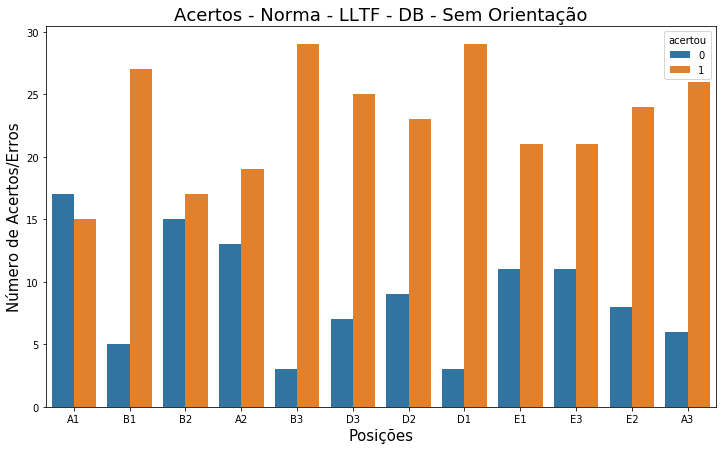

In [90]:
plt.figure(figsize=(12,7))
sns.countplot(x="real_location",hue="acertou",data=compare_table)
plt.title("Acertos - Norma - LLTF - DB - Sem Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Número de Acertos/Erros", fontsize=15)
plt.savefig("countplot_norma_db_LLTF_sem_orientacao.png")

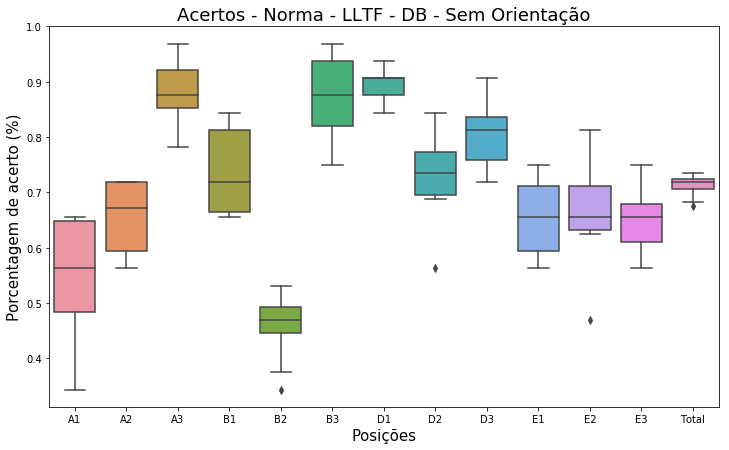

In [91]:
plt.figure(figsize=(12,7))
sns.boxplot(data=percent_acertos_df)
plt.title("Acertos - Norma - LLTF - DB - Sem Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Porcentagem de acerto (%)", fontsize=15)
plt.savefig("boxplot_norma_db_LLTF_sem_orientacao.png")

In [92]:
#Usando LLTF apenas e CONSIDERANDO A ORIENTAÇÃO!!! - Multiplas vezes
total_repeticoes = 10
colunas = csidf.columns[8:70]
locais = sorted(csidf["local"].unique())
percent_acertos_df = pd.DataFrame(columns=locais,index=range(total_repeticoes))
percent_acertos_df["Total"]=0.00
for n in range(total_repeticoes):
    aux = 0
    for k in csidf["local"].unique():
        for j in csidf["device"].unique():
            data_y = csidf[(csidf["local"]==k) & (csidf["device"]==j)].copy()
            datalltf= data_y[colunas]
            if aux==0:
                X_train, X_test, y_train, y_test = train_test_split(datalltf,data_y["local"],test_size=0.2)
                aux=aux+1
            else:
                X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(datalltf,data_y["local"],test_size=0.2)
                X_train = X_train.append(X_train_aux)
                X_test = X_test.append(X_test_aux)
                y_train = y_train.append(y_train_aux)
                y_test = y_test.append(y_test_aux)
    minmeansquareerror = []
    best_index_match = []
    best_atual_index = 0
    menor_mse = 10000
    mse_atual = 0
    for k  in X_test.index:
    # k = X_test.index[3]
        menor_mse = 10000
        best_atual_index = 0
        for j in X_train.index:
            mse_atual = 0
            if csidf["device"][k]==csidf["device"][j]:
                for w in X_train.columns:
                    mse_atual += (X_train[w][j] - X_test[w][k])**(2)
                if mse_atual < menor_mse:
                    menor_mse = mse_atual
                    best_atual_index = j
        minmeansquareerror.append(menor_mse)
        best_index_match.append(best_atual_index)
    # print(minmeansquareerror)
    # print(best_index_match)
    # print("A localização real é:" + y_test[k])
    # print("A resposta do algoritmo deu:" + y_train[best_index_match])
    #GERANDO UMA TABELA DE COMPARAÇÃO
    cols = ["index","real_location","estimated_location","acertou"]
    compare_table = pd.DataFrame(columns=cols)
    compare_table["index"] = y_test.index
    for x in range(len(compare_table)):
        compare_table["real_location"][x]=y_test[y_test.index[x]]

    x=0
    for i in best_index_match:
        compare_table["estimated_location"][x] = y_train[i]
        if(compare_table["estimated_location"][x] == compare_table["real_location"][x]):
            compare_table["acertou"][x]=1
        else:
            compare_table["acertou"][x]=0
        x=x+1

    for h in locais:
        acertos = len(compare_table[(compare_table["real_location"]==h) & (compare_table["acertou"]==1)])/len(compare_table[compare_table["real_location"]==h])
        percent_acertos_df[h][n]=acertos
    total = round((((len(compare_table[compare_table["acertou"]==1])/(len(compare_table))))*100),2)
    percent_acertos_df["Total"][n]= total
    print("Total de acerto da repeticao "+ str(n) +": " + str(total) + "%")

C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Total de acerto da repeticao 0: 82.29%
Total de acerto da repeticao 1: 84.11%
Total de acerto da repeticao 2: 84.11%
Total de acerto da repeticao 3: 84.38%
Total de acerto da repeticao 4: 84.9%
Total de acerto da repeticao 5: 81.77%
Total de acerto da repeticao 6: 83.59%
Total de acerto da repeticao 7: 83.59%
Total de acerto da repeticao 8: 82.55%
Total de acerto da repeticao 9: 83.33%


In [93]:
percent_acertos_df["Total"] = percent_acertos_df["Total"]/100
percent_acertos_df = percent_acertos_df.astype(float)
percent_acertos_df.to_excel("Localizacao_norma_db.xlsx",sheet_name='percent_acertos_dir_df')
percent_acertos_df

,A1,A2,A3,B1,B2,B3,D1,D2,D3,E1,E2,E3,Total
0,0.78125,0.84375,0.96875,0.68750,0.53125,0.93750,0.93750,0.78125,0.87500,0.81250,0.87500,0.84375,0.8229
1,0.81250,0.78125,0.90625,0.84375,0.65625,0.90625,0.93750,0.81250,1.00000,0.78125,0.81250,0.84375,0.8411
2,0.78125,0.90625,1.00000,0.84375,0.62500,0.96875,0.87500,0.87500,0.87500,0.75000,0.78125,0.81250,0.8411
3,0.84375,0.81250,1.00000,0.96875,0.62500,0.93750,0.96875,0.78125,0.93750,0.68750,0.75000,0.81250,0.8438
4,0.81250,0.78125,0.90625,0.81250,0.65625,0.87500,0.96875,0.93750,1.00000,0.75000,0.84375,0.84375,0.8490
5,0.71875,0.81250,0.93750,0.90625,0.56250,0.93750,0.93750,0.81250,0.84375,0.75000,0.81250,0.78125,0.8177
6,0.75000,0.78125,0.96875,0.75000,0.65625,0.84375,0.96875,0.90625,1.00000,0.81250,0.78125,0.81250,0.8359
7,0.75000,0.81250,0.93750,0.71875,0.65625,0.96875,0.96875,0.90625,0.93750,0.84375,0.68750,0.84375,0.8359
8,0.81250,0.78125,0.90625,0.71875,0.78125,0.93750,0.93750,0.84375,0.84375,0.75000,0.87500,0.71875,0.8255
9,0.78125,0.81250,0.93750,0.87500,0.75000,1.00000,0.90625,0.84375,0.93750,0.71875,0.71875,0.71875,0.8333


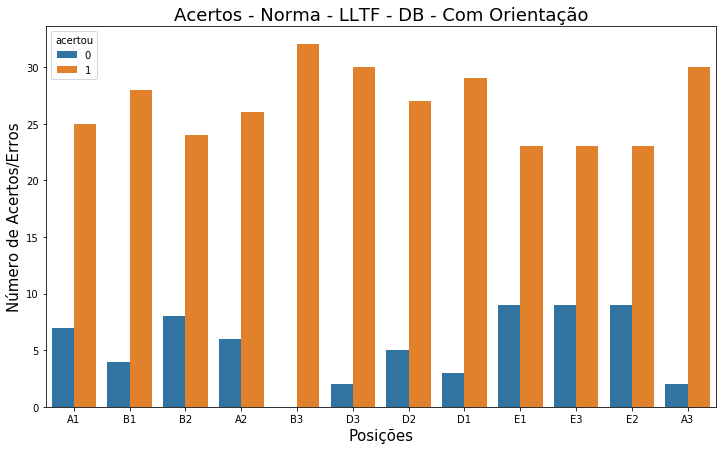

In [94]:
plt.figure(figsize=(12,7))
sns.countplot(x="real_location",hue="acertou",data=compare_table)
plt.title("Acertos - Norma - LLTF - DB - Com Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Número de Acertos/Erros", fontsize=15)
plt.savefig("countplot_norma_db_LLTF_com_orientacao.png")

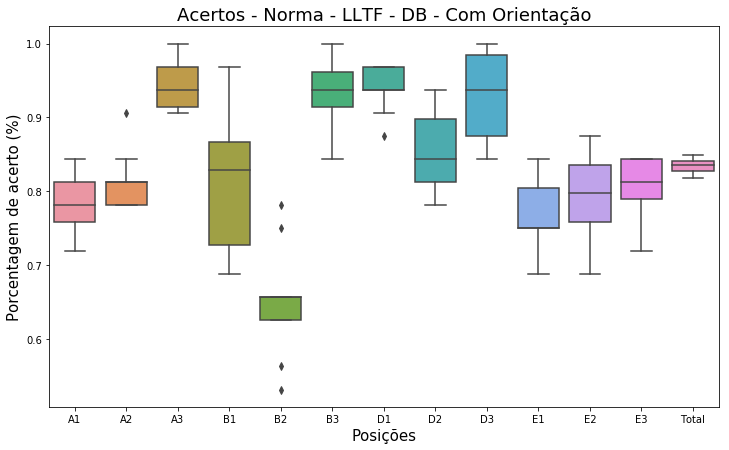

In [95]:
plt.figure(figsize=(12,7))
sns.boxplot(data=percent_acertos_df)
plt.title("Acertos - Norma - LLTF - DB - Com Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Porcentagem de acerto (%)", fontsize=15)
plt.savefig("boxplot_norma_db_LLTF_com_orientacao.png")

In [96]:
#Usando HT-LTF apenas e não considerando a direção - Multiplas vezes
total_repeticoes = 10
colunas = csidf.columns[70:134]
locais = sorted(csidf["local"].unique())
percent_acertos_df = pd.DataFrame(columns=locais,index=range(total_repeticoes))
percent_acertos_df["Total"]=0.00
for n in range(total_repeticoes):
    aux = 0
    for k in csidf["local"].unique():
        for j in csidf["device"].unique():
            data_y = csidf[(csidf["local"]==k) & (csidf["device"]==j)].copy()
            datalltf= data_y[colunas]
            if aux==0:
                X_train, X_test, y_train, y_test = train_test_split(datalltf,data_y["local"],test_size=0.2)
                aux=aux+1
            else:
                X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(datalltf,data_y["local"],test_size=0.2)
                X_train = X_train.append(X_train_aux)
                X_test = X_test.append(X_test_aux)
                y_train = y_train.append(y_train_aux)
                y_test = y_test.append(y_test_aux)
    minmeansquareerror = []
    best_index_match = []
    best_atual_index = 0
    menor_mse = 10000
    mse_atual = 0
    for k  in X_test.index:
    # k = X_test.index[3]
        menor_mse = 10000
        best_atual_index = 0
        for j in X_train.index:
            mse_atual = 0
            for w in X_train.columns:
                mse_atual += (X_train[w][j] - X_test[w][k])**(2)
            if mse_atual < menor_mse:
                menor_mse = mse_atual
                best_atual_index = j
        minmeansquareerror.append(menor_mse)
        best_index_match.append(best_atual_index)
    # print(minmeansquareerror)
    # print(best_index_match)
    # print("A localização real é:" + y_test[k])
    # print("A resposta do algoritmo deu:" + y_train[best_index_match])
    #GERANDO UMA TABELA DE COMPARAÇÃO
    cols = ["index","real_location","estimated_location","acertou"]
    compare_table = pd.DataFrame(columns=cols)
    compare_table["index"] = y_test.index
    for x in range(len(compare_table)):
        compare_table["real_location"][x]=y_test[y_test.index[x]]

    x=0
    for i in best_index_match:
        compare_table["estimated_location"][x] = y_train[i]
        if(compare_table["estimated_location"][x] == compare_table["real_location"][x]):
            compare_table["acertou"][x]=1
        else:
            compare_table["acertou"][x]=0
        x=x+1

    for h in locais:
        acertos = len(compare_table[(compare_table["real_location"]==h) & (compare_table["acertou"]==1)])/len(compare_table[compare_table["real_location"]==h])
        percent_acertos_df[h][n]=acertos
    total = round((((len(compare_table[compare_table["acertou"]==1])/(len(compare_table))))*100),2)
    percent_acertos_df["Total"][n]= total
    print("Total de acerto da repeticao "+ str(n) +": " + str(total) + "%")

C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Total de acerto da repeticao 0: 74.48%
Total de acerto da repeticao 1: 75.78%
Total de acerto da repeticao 2: 74.48%
Total de acerto da repeticao 3: 75.26%
Total de acerto da repeticao 4: 79.17%
Total de acerto da repeticao 5: 77.6%
Total de acerto da repeticao 6: 76.56%
Total de acerto da repeticao 7: 75.78%
Total de acerto da repeticao 8: 78.12%
Total de acerto da repeticao 9: 74.22%


In [97]:
percent_acertos_df["Total"] = percent_acertos_df["Total"]/100
percent_acertos_df = percent_acertos_df.astype(float)
percent_acertos_df.to_excel("Localizacao_norma_db.xlsx",sheet_name='percent_acertos_HT_sem_dir_df')
percent_acertos_df

,A1,A2,A3,B1,B2,B3,D1,D2,D3,E1,E2,E3,Total
0,0.50000,0.59375,0.96875,0.78125,0.65625,0.90625,0.93750,0.75000,0.84375,0.68750,0.62500,0.68750,0.7448
1,0.65625,0.62500,1.00000,0.87500,0.46875,0.87500,0.93750,0.84375,0.90625,0.65625,0.68750,0.56250,0.7578
2,0.59375,0.62500,0.93750,0.75000,0.53125,0.87500,0.84375,0.78125,0.84375,0.75000,0.75000,0.65625,0.7448
3,0.59375,0.65625,0.90625,0.68750,0.50000,0.90625,0.93750,0.71875,0.93750,0.71875,0.78125,0.68750,0.7526
4,0.62500,0.65625,0.96875,0.75000,0.65625,0.93750,0.90625,0.90625,0.90625,0.84375,0.71875,0.62500,0.7917
5,0.62500,0.65625,1.00000,0.81250,0.50000,1.00000,0.90625,0.78125,0.87500,0.62500,0.81250,0.71875,0.7760
6,0.81250,0.68750,0.87500,0.65625,0.50000,0.93750,0.90625,0.78125,0.84375,0.71875,0.68750,0.78125,0.7656
7,0.71875,0.62500,0.93750,0.75000,0.59375,0.87500,0.96875,0.68750,0.93750,0.65625,0.62500,0.71875,0.7578
8,0.56250,0.81250,0.96875,0.78125,0.62500,0.90625,0.87500,0.87500,0.90625,0.65625,0.81250,0.59375,0.7812
9,0.43750,0.62500,0.93750,0.78125,0.43750,0.96875,0.96875,0.81250,0.81250,0.65625,0.81250,0.65625,0.7422


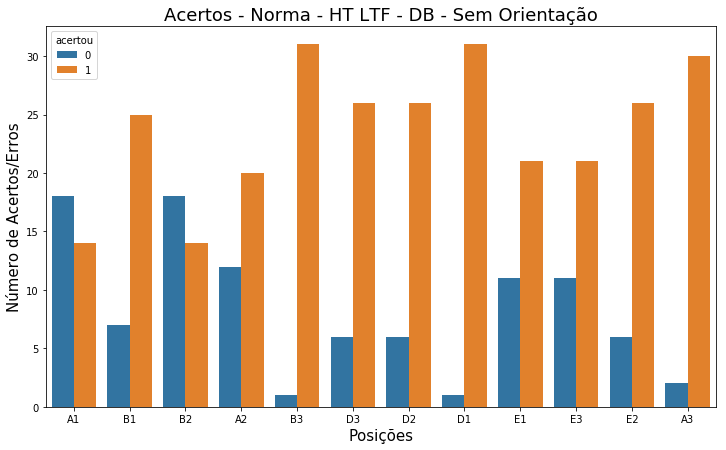

In [98]:
plt.figure(figsize=(12,7))
sns.countplot(x="real_location",hue="acertou",data=compare_table)
plt.title("Acertos - Norma - HT LTF - DB - Sem Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Número de Acertos/Erros", fontsize=15)
plt.savefig("countplot_norma_db_HT_LTF_Sem_orientacao.png")

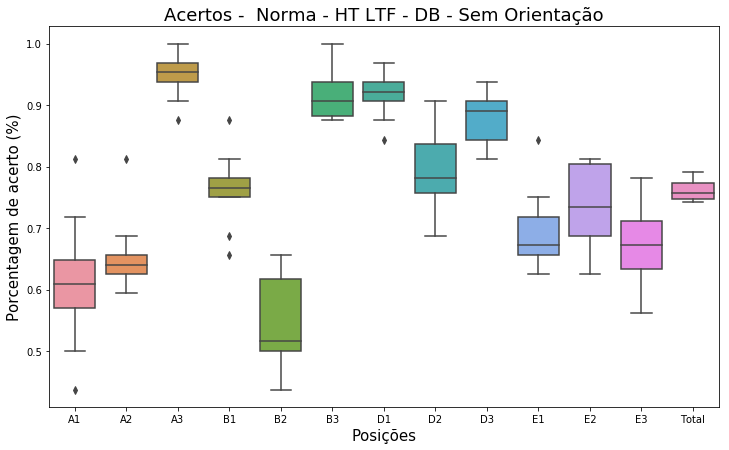

In [99]:
plt.figure(figsize=(12,7))
sns.boxplot(data=percent_acertos_df)
plt.title("Acertos -  Norma - HT LTF - DB - Sem Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Porcentagem de acerto (%)", fontsize=15)
plt.savefig("boxplot_norma_db_HT_LTF_Sem_orientacao.png")

In [100]:
#Usando HT LTF apenas e CONSIDERANDO A ORIENTAÇÃO!!! - Multiplas vezes
total_repeticoes = 10
colunas = csidf.columns[70:134]
locais = sorted(csidf["local"].unique())
percent_acertos_df = pd.DataFrame(columns=locais,index=range(total_repeticoes))
percent_acertos_df["Total"]=0.00
for n in range(total_repeticoes):
    aux = 0
    for k in csidf["local"].unique():
        for j in csidf["device"].unique():
            data_y = csidf[(csidf["local"]==k) & (csidf["device"]==j)].copy()
            datalltf= data_y[colunas]
            if aux==0:
                X_train, X_test, y_train, y_test = train_test_split(datalltf,data_y["local"],test_size=0.2)
                aux=aux+1
            else:
                X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(datalltf,data_y["local"],test_size=0.2)
                X_train = X_train.append(X_train_aux)
                X_test = X_test.append(X_test_aux)
                y_train = y_train.append(y_train_aux)
                y_test = y_test.append(y_test_aux)
    minmeansquareerror = []
    best_index_match = []
    best_atual_index = 0
    menor_mse = 10000
    mse_atual = 0
    for k  in X_test.index:
    # k = X_test.index[3]
        menor_mse = 10000
        best_atual_index = 0
        for j in X_train.index:
            mse_atual = 0
            if csidf["device"][k]==csidf["device"][j]:
                for w in X_train.columns:
                    mse_atual += (X_train[w][j] - X_test[w][k])**(2)
                if mse_atual < menor_mse:
                    menor_mse = mse_atual
                    best_atual_index = j
        minmeansquareerror.append(menor_mse)
        best_index_match.append(best_atual_index)
    # print(minmeansquareerror)
    # print(best_index_match)
    # print("A localização real é:" + y_test[k])
    # print("A resposta do algoritmo deu:" + y_train[best_index_match])
    #GERANDO UMA TABELA DE COMPARAÇÃO
    cols = ["index","real_location","estimated_location","acertou"]
    compare_table = pd.DataFrame(columns=cols)
    compare_table["index"] = y_test.index
    for x in range(len(compare_table)):
        compare_table["real_location"][x]=y_test[y_test.index[x]]

    x=0
    for i in best_index_match:
        compare_table["estimated_location"][x] = y_train[i]
        if(compare_table["estimated_location"][x] == compare_table["real_location"][x]):
            compare_table["acertou"][x]=1
        else:
            compare_table["acertou"][x]=0
        x=x+1

    for h in locais:
        acertos = len(compare_table[(compare_table["real_location"]==h) & (compare_table["acertou"]==1)])/len(compare_table[compare_table["real_location"]==h])
        percent_acertos_df[h][n]=acertos
    total = round((((len(compare_table[compare_table["acertou"]==1])/(len(compare_table))))*100),2)
    percent_acertos_df["Total"][n]= total
    print("Total de acerto da repeticao "+ str(n) +": " + str(total) + "%")

C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Total de acerto da repeticao 0: 83.59%
Total de acerto da repeticao 1: 89.06%
Total de acerto da repeticao 2: 88.02%
Total de acerto da repeticao 3: 85.94%
Total de acerto da repeticao 4: 85.16%
Total de acerto da repeticao 5: 86.2%
Total de acerto da repeticao 6: 85.42%
Total de acerto da repeticao 7: 87.5%
Total de acerto da repeticao 8: 88.8%
Total de acerto da repeticao 9: 85.16%


In [ ]:
percent_acertos_df["Total"] = percent_acertos_df["Total"]/100
percent_acertos_df = percent_acertos_df.astype(float)
percent_acertos_df.to_excel("Localizacao_norma_db.xlsx",sheet_name='percent_acertos_HT_com_dir_df')
percent_acertos_df

In [117]:
percent_acertos_df = pd.read_excel("Localizacao_norma_db.xlsx",sheet_name="percent_acertos_HT_com_dir_df")
percent_acertos_df

,A1,A2,A3,B1,B2,B3,D1,D2,D3,E1,E2,E3,Total
0,0.87500,0.81250,0.96875,0.81250,0.56250,0.93750,0.96875,0.75000,0.84375,0.84375,0.93750,0.71875,0.8359
1,0.84375,0.87500,1.00000,0.90625,0.65625,0.90625,1.00000,0.87500,0.96875,0.87500,0.90625,0.87500,0.8906
2,0.93750,0.84375,1.00000,0.81250,0.71875,0.93750,1.00000,0.84375,0.84375,0.75000,0.93750,0.93750,0.8802
3,0.84375,0.78125,0.90625,0.96875,0.68750,0.87500,1.00000,0.81250,0.96875,0.78125,0.87500,0.81250,0.8594
4,0.90625,0.81250,1.00000,0.84375,0.75000,0.87500,0.93750,0.71875,0.93750,0.84375,0.78125,0.81250,0.8516
5,0.81250,0.71875,0.93750,0.84375,0.75000,0.93750,1.00000,0.87500,0.93750,0.93750,0.81250,0.78125,0.8620
6,0.87500,0.84375,1.00000,0.84375,0.59375,0.93750,1.00000,0.90625,0.87500,0.78125,0.81250,0.78125,0.8542
7,0.90625,0.84375,0.96875,0.90625,0.71875,0.90625,1.00000,0.84375,0.87500,0.75000,0.90625,0.87500,0.8750
8,0.84375,0.87500,0.96875,0.87500,0.75000,1.00000,0.96875,0.84375,0.93750,0.87500,0.87500,0.84375,0.8880
9,0.90625,0.78125,1.00000,0.75000,0.71875,0.90625,0.96875,0.81250,0.96875,0.71875,0.87500,0.81250,0.8516


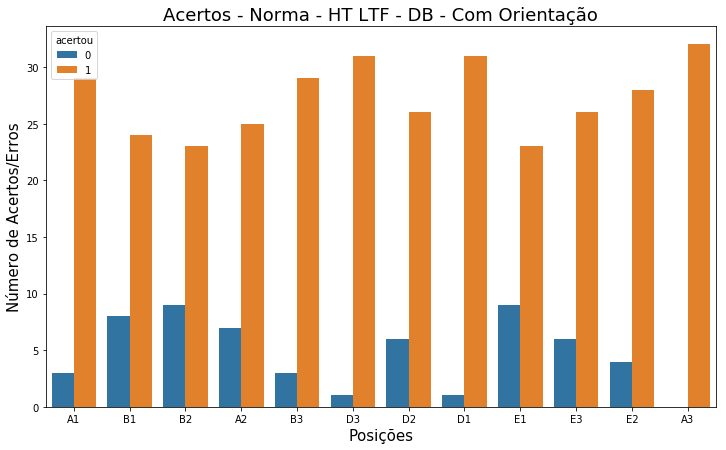

In [103]:
plt.figure(figsize=(12,7))
sns.countplot(x="real_location",hue="acertou",data=compare_table)
plt.title("Acertos - Norma - HT LTF - DB - Com Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Número de Acertos/Erros", fontsize=15)
plt.savefig("countplot_norma_db_HT_LTF_Com_orientacao.png")

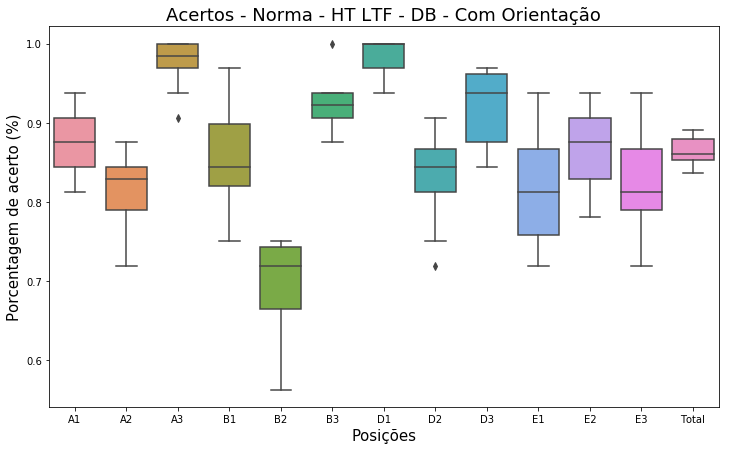

In [118]:
plt.figure(figsize=(12,7))
sns.boxplot(data=percent_acertos_df)
plt.title("Acertos - Norma - HT LTF - DB - Com Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Porcentagem de acerto (%)", fontsize=15)
plt.savefig("boxplot_norma_db_HT_LTF_Com_orientacao.png")

In [105]:
#Usando HT-LTF + LLTF e não considerando a direção - Multiplas vezes
total_repeticoes = 10
colunas = csidf.columns[8:134]
locais = sorted(csidf["local"].unique())
percent_acertos_df = pd.DataFrame(columns=locais,index=range(total_repeticoes))
percent_acertos_df["Total"]=0.00
for n in range(total_repeticoes):
    aux = 0
    for k in csidf["local"].unique():
        for j in csidf["device"].unique():
            data_y = csidf[(csidf["local"]==k) & (csidf["device"]==j)].copy()
            datalltf= data_y[colunas]
            if aux==0:
                X_train, X_test, y_train, y_test = train_test_split(datalltf,data_y["local"],test_size=0.2)
                aux=aux+1
            else:
                X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(datalltf,data_y["local"],test_size=0.2)
                X_train = X_train.append(X_train_aux)
                X_test = X_test.append(X_test_aux)
                y_train = y_train.append(y_train_aux)
                y_test = y_test.append(y_test_aux)
    minmeansquareerror = []
    best_index_match = []
    best_atual_index = 0
    menor_mse = 10000
    mse_atual = 0
    for k  in X_test.index:
    # k = X_test.index[3]
        menor_mse = 10000
        best_atual_index = 0
        for j in X_train.index:
            mse_atual = 0
            for w in X_train.columns:
                mse_atual += (X_train[w][j] - X_test[w][k])**(2)
            if mse_atual < menor_mse:
                menor_mse = mse_atual
                best_atual_index = j
        minmeansquareerror.append(menor_mse)
        best_index_match.append(best_atual_index)
    # print(minmeansquareerror)
    # print(best_index_match)
    # print("A localização real é:" + y_test[k])
    # print("A resposta do algoritmo deu:" + y_train[best_index_match])
    #GERANDO UMA TABELA DE COMPARAÇÃO
    cols = ["index","real_location","estimated_location","acertou"]
    compare_table = pd.DataFrame(columns=cols)
    compare_table["index"] = y_test.index
    for x in range(len(compare_table)):
        compare_table["real_location"][x]=y_test[y_test.index[x]]

    x=0
    for i in best_index_match:
        compare_table["estimated_location"][x] = y_train[i]
        if(compare_table["estimated_location"][x] == compare_table["real_location"][x]):
            compare_table["acertou"][x]=1
        else:
            compare_table["acertou"][x]=0
        x=x+1

    for h in locais:
        acertos = len(compare_table[(compare_table["real_location"]==h) & (compare_table["acertou"]==1)])/len(compare_table[compare_table["real_location"]==h])
        percent_acertos_df[h][n]=acertos
    total = round((((len(compare_table[compare_table["acertou"]==1])/(len(compare_table))))*100),2)
    percent_acertos_df["Total"][n]= total
    print("Total de acerto da repeticao "+ str(n) +": " + str(total) + "%")

C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Total de acerto da repeticao 0: 73.44%
Total de acerto da repeticao 1: 74.22%
Total de acerto da repeticao 2: 76.04%
Total de acerto da repeticao 3: 75.78%
Total de acerto da repeticao 4: 72.66%
Total de acerto da repeticao 5: 72.14%
Total de acerto da repeticao 6: 75.52%
Total de acerto da repeticao 7: 73.7%
Total de acerto da repeticao 8: 74.74%
Total de acerto da repeticao 9: 74.74%


In [106]:
percent_acertos_df["Total"] = percent_acertos_df["Total"]/100
percent_acertos_df = percent_acertos_df.astype(float)
percent_acertos_df.to_excel("Localizacao_norma_db.xlsx",sheet_name='perc_LLTF_HTLTF_no_dir_df')
percent_acertos_df

,A1,A2,A3,B1,B2,B3,D1,D2,D3,E1,E2,E3,Total
0,0.46875,0.68750,0.87500,0.68750,0.43750,0.90625,0.93750,0.78125,0.90625,0.68750,0.71875,0.71875,0.7344
1,0.59375,0.59375,0.96875,0.84375,0.53125,0.90625,0.93750,0.78125,0.81250,0.71875,0.56250,0.65625,0.7422
2,0.62500,0.75000,0.93750,0.75000,0.56250,0.84375,0.93750,0.71875,0.84375,0.68750,0.78125,0.68750,0.7604
3,0.65625,0.65625,0.90625,0.71875,0.56250,0.96875,0.87500,0.75000,0.75000,0.84375,0.59375,0.81250,0.7578
4,0.65625,0.75000,0.81250,0.78125,0.46875,0.90625,0.93750,0.59375,0.81250,0.65625,0.62500,0.71875,0.7266
5,0.53125,0.68750,0.90625,0.78125,0.50000,0.96875,1.00000,0.65625,0.68750,0.62500,0.65625,0.65625,0.7214
6,0.59375,0.62500,0.93750,0.84375,0.56250,0.87500,0.90625,0.81250,0.84375,0.65625,0.65625,0.75000,0.7552
7,0.53125,0.81250,0.90625,0.71875,0.56250,0.90625,0.81250,0.71875,0.81250,0.62500,0.71875,0.71875,0.7370
8,0.46875,0.71875,0.84375,0.75000,0.40625,0.90625,1.00000,0.78125,0.93750,0.68750,0.75000,0.71875,0.7474
9,0.56250,0.56250,0.93750,0.81250,0.56250,0.96875,0.84375,0.65625,0.90625,0.71875,0.68750,0.75000,0.7474


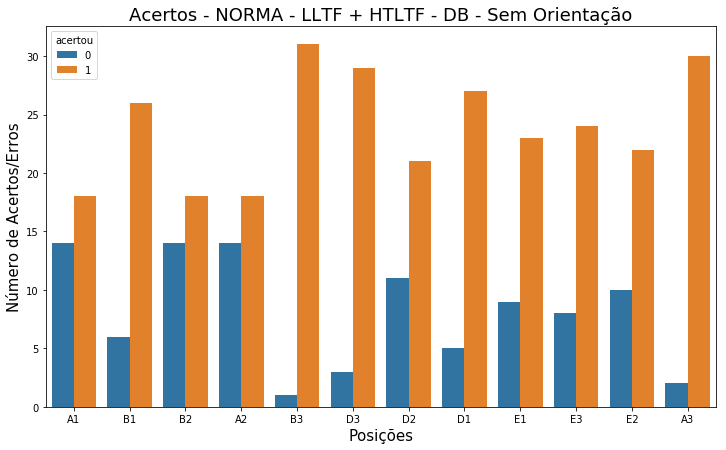

In [107]:
plt.figure(figsize=(12,7))
sns.countplot(x="real_location",hue="acertou",data=compare_table)
plt.title("Acertos - NORMA - LLTF + HTLTF - DB - Sem Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Número de Acertos/Erros", fontsize=15)
plt.savefig("countplot_norma_db_LLTF_HT_LTF_Sem_dir.png")

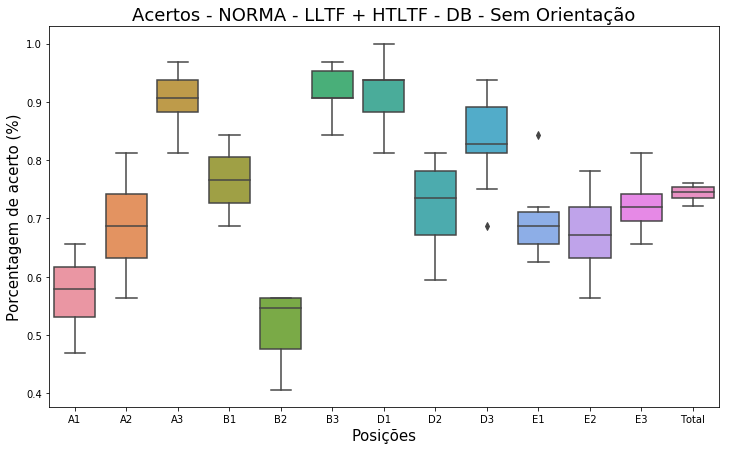

In [108]:
plt.figure(figsize=(12,7))
sns.boxplot(data=percent_acertos_df)
plt.title("Acertos - NORMA - LLTF + HTLTF - DB - Sem Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Porcentagem de acerto (%)", fontsize=15)
plt.savefig("boxplot_norma_db_LLTF_HT_LTF_Sem_dir.png")

In [109]:
#Usando HT-LTF + LLTF e CONSIDERANDO A ORIENTAÇÃO!!! - Multiplas vezes
total_repeticoes = 10
colunas = csidf.columns[8:134]
locais = sorted(csidf["local"].unique())
percent_acertos_df = pd.DataFrame(columns=locais,index=range(total_repeticoes))
percent_acertos_df["Total"]=0.00
for n in range(total_repeticoes):
    aux = 0
    for k in csidf["local"].unique():
        for j in csidf["device"].unique():
            data_y = csidf[(csidf["local"]==k) & (csidf["device"]==j)].copy()
            datalltf= data_y[colunas]
            if aux==0:
                X_train, X_test, y_train, y_test = train_test_split(datalltf,data_y["local"],test_size=0.2)
                aux=aux+1
            else:
                X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(datalltf,data_y["local"],test_size=0.2)
                X_train = X_train.append(X_train_aux)
                X_test = X_test.append(X_test_aux)
                y_train = y_train.append(y_train_aux)
                y_test = y_test.append(y_test_aux)
    minmeansquareerror = []
    best_index_match = []
    best_atual_index = 0
    menor_mse = 10000
    mse_atual = 0
    for k  in X_test.index:
    # k = X_test.index[3]
        menor_mse = 10000
        best_atual_index = 0
        for j in X_train.index:
            mse_atual = 0
            if csidf["device"][k]==csidf["device"][j]:
                for w in X_train.columns:
                    mse_atual += (X_train[w][j] - X_test[w][k])**(2)
                if mse_atual < menor_mse:
                    menor_mse = mse_atual
                    best_atual_index = j
        minmeansquareerror.append(menor_mse)
        best_index_match.append(best_atual_index)
    # print(minmeansquareerror)
    # print(best_index_match)
    # print("A localização real é:" + y_test[k])
    # print("A resposta do algoritmo deu:" + y_train[best_index_match])
    #GERANDO UMA TABELA DE COMPARAÇÃO
    cols = ["index","real_location","estimated_location","acertou"]
    compare_table = pd.DataFrame(columns=cols)
    compare_table["index"] = y_test.index
    for x in range(len(compare_table)):
        compare_table["real_location"][x]=y_test[y_test.index[x]]

    x=0
    for i in best_index_match:
        compare_table["estimated_location"][x] = y_train[i]
        if(compare_table["estimated_location"][x] == compare_table["real_location"][x]):
            compare_table["acertou"][x]=1
        else:
            compare_table["acertou"][x]=0
        x=x+1

    for h in locais:
        acertos = len(compare_table[(compare_table["real_location"]==h) & (compare_table["acertou"]==1)])/len(compare_table[compare_table["real_location"]==h])
        percent_acertos_df[h][n]=acertos
    total = round((((len(compare_table[compare_table["acertou"]==1])/(len(compare_table))))*100),2)
    percent_acertos_df["Total"][n]= total
    print("Total de acerto da repeticao "+ str(n) +": " + str(total) + "%")

C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Total de acerto da repeticao 0: 81.51%
Total de acerto da repeticao 1: 83.59%
Total de acerto da repeticao 2: 84.38%
Total de acerto da repeticao 3: 82.29%
Total de acerto da repeticao 4: 85.94%
Total de acerto da repeticao 5: 84.11%
Total de acerto da repeticao 6: 82.55%
Total de acerto da repeticao 7: 84.9%
Total de acerto da repeticao 8: 82.03%
Total de acerto da repeticao 9: 82.29%


In [110]:
percent_acertos_df["Total"] = percent_acertos_df["Total"]/100
percent_acertos_df = percent_acertos_df.astype(float)
percent_acertos_df.to_excel("Localizacao_norma_db.xlsx",sheet_name='perc_LLTF_HTLTF_dir_df')
percent_acertos_df

,A1,A2,A3,B1,B2,B3,D1,D2,D3,E1,E2,E3,Total
0,0.81250,0.71875,0.96875,0.81250,0.56250,0.93750,1.00000,0.81250,0.93750,0.78125,0.75000,0.68750,0.8151
1,0.75000,0.71875,0.96875,0.78125,0.62500,0.93750,1.00000,0.84375,0.90625,0.78125,0.81250,0.90625,0.8359
2,0.78125,0.71875,0.96875,0.78125,0.68750,0.93750,0.96875,0.87500,0.93750,0.84375,0.81250,0.81250,0.8438
3,0.81250,0.75000,0.96875,0.84375,0.59375,0.84375,0.96875,0.81250,0.90625,0.81250,0.75000,0.81250,0.8229
4,0.81250,0.87500,1.00000,0.78125,0.75000,0.96875,0.96875,0.81250,0.93750,0.87500,0.75000,0.78125,0.8594
5,0.81250,0.84375,1.00000,0.84375,0.62500,0.87500,0.96875,0.78125,0.87500,0.78125,0.87500,0.81250,0.8411
6,0.78125,0.87500,1.00000,0.78125,0.68750,0.93750,0.90625,0.87500,0.87500,0.68750,0.78125,0.71875,0.8255
7,0.71875,0.78125,1.00000,0.84375,0.68750,0.90625,0.93750,0.84375,0.93750,0.81250,0.84375,0.87500,0.8490
8,0.75000,0.87500,0.93750,0.87500,0.68750,0.87500,1.00000,0.75000,0.87500,0.65625,0.75000,0.81250,0.8203
9,0.65625,0.68750,0.96875,0.75000,0.78125,0.87500,0.96875,0.84375,0.87500,0.87500,0.81250,0.78125,0.8229


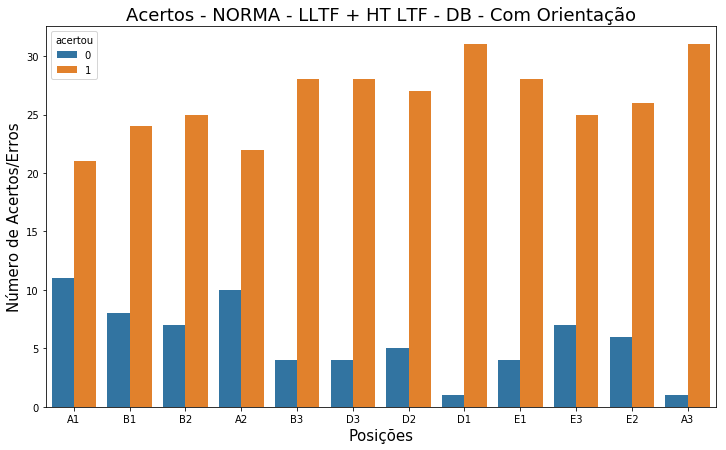

In [111]:
plt.figure(figsize=(12,7))
sns.countplot(x="real_location",hue="acertou",data=compare_table)
plt.title("Acertos - NORMA - LLTF + HT LTF - DB - Com Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Número de Acertos/Erros", fontsize=15)
plt.savefig("countplot_norma_db_LLTF_HT_LTF_dir.png")

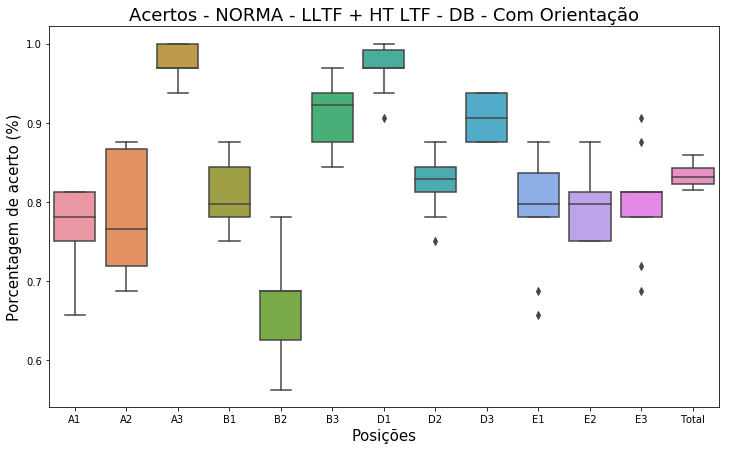

In [112]:
plt.figure(figsize=(12,7))
sns.boxplot(data=percent_acertos_df)
plt.title("Acertos - NORMA - LLTF + HT LTF - DB - Com Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Porcentagem de acerto (%)", fontsize=15)
plt.savefig("boxplot_norma_db_LLTF_HT_LTF_dir.png")

In [128]:
csidf.head()

,device,local,x,y,P_MW_LLTF,P_MW_HTLTF,P_DBM_LLTF,P_DBM_HTLTF,LLTF_-32,LLTF_-31,...,HTLTF_22,HTLTF_23,HTLTF_24,HTLTF_25,HTLTF_26,HTLTF_27,HTLTF_28,HTLTF_29,HTLTF_30,HTLTF_31
0,DIR,A1,1,3,68,1763,18.326305,32.462711,0.0,0.0,...,0.010802,0.009290,0.008327,0.007399,0.007119,0.006262,0.006651,0.001093,0.000000,0.000691
1,DIR,A1,1,3,91,2902,19.625982,34.627993,0.0,0.0,...,0.011217,0.010342,0.009044,0.008254,0.008135,0.007276,0.006987,0.001679,0.001042,0.000000
2,DIR,A1,1,3,79,1819,19.009755,32.599737,0.0,0.0,...,0.010077,0.008680,0.008371,0.007578,0.006863,0.006448,0.006138,0.001072,0.000479,0.000678
3,DIR,A1,1,3,82,2482,19.157725,33.949590,0.0,0.0,...,0.010430,0.009225,0.008090,0.007391,0.007126,0.006009,0.005721,0.000950,0.000000,0.000475
4,DIR,A1,1,3,43,736,16.433430,28.670187,0.0,0.0,...,0.010900,0.009533,0.008301,0.007413,0.007168,0.007106,0.006741,0.001219,0.000545,0.000771


In [120]:
colunas = csidf.columns[70:134]
aux = 0
for k in csidf["local"].unique():
    for j in csidf["device"].unique():
        data_y = csidf[(csidf["local"]==k) & (csidf["device"]==j)].copy()
        datalltf= data_y[colunas]
        if aux==0:
            X_train, X_test, y_train, y_test = train_test_split(datalltf,data_y["local"],test_size=0.2)
            aux=aux+1
        else:
            X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(datalltf,data_y["local"],test_size=0.2)
            X_train = X_train.append(X_train_aux)
            X_test = X_test.append(X_test_aux)
            y_train = y_train.append(y_train_aux)
            y_test = y_test.append(y_test_aux)

In [121]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))

C:\Users\iande\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

          A1       0.00      0.00      0.00        32
          A2       0.25      0.62      0.35        32
          A3       0.16      0.47      0.24        32
          B1       1.00      0.16      0.27        32
          B2       0.14      0.06      0.09        32
          B3       0.13      0.31      0.18        32
          D1       0.00      0.00      0.00        32
          D2       0.00      0.00      0.00        32
          D3       0.24      0.47      0.32        32
          E1       0.17      0.16      0.16        32
          E2       0.05      0.03      0.04        32
          E3       0.80      0.12      0.22        32

   micro avg       0.20      0.20      0.20       384
   macro avg       0.25      0.20      0.16       384
weighted avg       0.25      0.20      0.16       384



C:\Users\iande\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\iande\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\iande\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [122]:
param_grid = {'C': [0.1,1, 10,50, 100,500, 1000], 'gamma': [1,0.1,0.05,0.01,0.005,0.001,0.0001], 'kernel': ['rbf', 'linear','poly','sigmoid']}

In [123]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
# Talvez demore um pouco
grid.fit(X_train,y_train)

C:\Users\iande\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 196 candidates, totalling 588 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.13178294573643412, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.15503875968992248, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.10515873015873016, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.13178294573643412, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.15503875968992248, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.10515873015873016, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV]  C=0.1, gamma=1, kernel=poly, score=0.14922480620155038, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV]  C=0.1, gamma=1, kernel=poly, score=0.15310077519379844, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV]  C=0.1, gamma=1, kernel=poly, score=0.1111111111111111, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..

[CV]  C=0.1, gamma=0.005, kernel=sigmoid, score=0.13178294573643412, total=   0.1s
[CV] C=0.1, gamma=0.005, kernel=sigmoid ..............................
[CV]  C=0.1, gamma=0.005, kernel=sigmoid, score=0.15503875968992248, total=   0.1s
[CV] C=0.1, gamma=0.005, kernel=sigmoid ..............................
[CV]  C=0.1, gamma=0.005, kernel=sigmoid, score=0.10515873015873016, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.13372093023255813, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.15891472868217055, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.10515873015873016, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV]  C=0.1, gamma=0.001, kernel=linear, score=0.13178294573643412, total=   0.0s
[CV] C

[CV]  C=1, gamma=0.05, kernel=linear, score=0.15503875968992248, total=   0.0s
[CV] C=1, gamma=0.05, kernel=linear ..................................
[CV]  C=1, gamma=0.05, kernel=linear, score=0.10515873015873016, total=   0.0s
[CV] C=1, gamma=0.05, kernel=poly ....................................
[CV]  C=1, gamma=0.05, kernel=poly, score=0.14922480620155038, total=   0.0s
[CV] C=1, gamma=0.05, kernel=poly ....................................
[CV]  C=1, gamma=0.05, kernel=poly, score=0.15310077519379844, total=   0.0s
[CV] C=1, gamma=0.05, kernel=poly ....................................
[CV]  C=1, gamma=0.05, kernel=poly, score=0.1111111111111111, total=   0.0s
[CV] C=1, gamma=0.05, kernel=sigmoid .................................
[CV]  C=1, gamma=0.05, kernel=sigmoid, score=0.13178294573643412, total=   0.1s
[CV] C=1, gamma=0.05, kernel=sigmoid .................................
[CV]  C=1, gamma=0.05, kernel=sigmoid, score=0.15503875968992248, total=   0.1s
[CV] C=1, gamma=0.05, kern

[CV]  C=1, gamma=0.0001, kernel=sigmoid, score=0.10515873015873016, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.13178294573643412, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.1569767441860465, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.10912698412698413, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV]  C=10, gamma=1, kernel=linear, score=0.13178294573643412, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV]  C=10, gamma=1, kernel=linear, score=0.15503875968992248, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV]  C=10, gamma=1, kernel=linear, score=0.10515873015873016, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ........

[CV]  C=10, gamma=0.005, kernel=poly, score=0.14922480620155038, total=   0.0s
[CV] C=10, gamma=0.005, kernel=poly ..................................
[CV]  C=10, gamma=0.005, kernel=poly, score=0.15310077519379844, total=   0.0s
[CV] C=10, gamma=0.005, kernel=poly ..................................
[CV]  C=10, gamma=0.005, kernel=poly, score=0.1111111111111111, total=   0.0s
[CV] C=10, gamma=0.005, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.005, kernel=sigmoid, score=0.13178294573643412, total=   0.1s
[CV] C=10, gamma=0.005, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.005, kernel=sigmoid, score=0.15503875968992248, total=   0.1s
[CV] C=10, gamma=0.005, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.005, kernel=sigmoid, score=0.10515873015873016, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.13372093023255813, total=   0.1s
[CV] C=10, gam

[CV]  C=50, gamma=0.05, kernel=rbf, score=0.15503875968992248, total=   0.1s
[CV] C=50, gamma=0.05, kernel=rbf ....................................
[CV]  C=50, gamma=0.05, kernel=rbf, score=0.10515873015873016, total=   0.1s
[CV] C=50, gamma=0.05, kernel=linear .................................
[CV]  C=50, gamma=0.05, kernel=linear, score=0.13372093023255813, total=   0.0s
[CV] C=50, gamma=0.05, kernel=linear .................................
[CV]  C=50, gamma=0.05, kernel=linear, score=0.14922480620155038, total=   0.0s
[CV] C=50, gamma=0.05, kernel=linear .................................
[CV]  C=50, gamma=0.05, kernel=linear, score=0.10912698412698413, total=   0.0s
[CV] C=50, gamma=0.05, kernel=poly ...................................
[CV]  C=50, gamma=0.05, kernel=poly, score=0.14922480620155038, total=   0.0s
[CV] C=50, gamma=0.05, kernel=poly ...................................
[CV]  C=50, gamma=0.05, kernel=poly, score=0.15310077519379844, total=   0.0s
[CV] C=50, gamma=0.05, k

[CV]  C=50, gamma=0.0001, kernel=poly, score=0.06547619047619048, total=   0.0s
[CV] C=50, gamma=0.0001, kernel=sigmoid ..............................
[CV]  C=50, gamma=0.0001, kernel=sigmoid, score=0.13178294573643412, total=   0.1s
[CV] C=50, gamma=0.0001, kernel=sigmoid ..............................
[CV]  C=50, gamma=0.0001, kernel=sigmoid, score=0.15503875968992248, total=   0.1s
[CV] C=50, gamma=0.0001, kernel=sigmoid ..............................
[CV]  C=50, gamma=0.0001, kernel=sigmoid, score=0.10515873015873016, total=   0.1s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.13372093023255813, total=   0.1s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.18604651162790697, total=   0.1s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.10912698412698413, total=   0.1s
[CV] C=100, gamma=1,

[CV]  C=100, gamma=0.005, kernel=linear, score=0.16666666666666666, total=   0.0s
[CV] C=100, gamma=0.005, kernel=linear ...............................
[CV]  C=100, gamma=0.005, kernel=linear, score=0.10317460317460317, total=   0.0s
[CV] C=100, gamma=0.005, kernel=poly .................................
[CV]  C=100, gamma=0.005, kernel=poly, score=0.14922480620155038, total=   0.0s
[CV] C=100, gamma=0.005, kernel=poly .................................
[CV]  C=100, gamma=0.005, kernel=poly, score=0.15310077519379844, total=   0.0s
[CV] C=100, gamma=0.005, kernel=poly .................................
[CV]  C=100, gamma=0.005, kernel=poly, score=0.1111111111111111, total=   0.0s
[CV] C=100, gamma=0.005, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.005, kernel=sigmoid, score=0.13178294573643412, total=   0.1s
[CV] C=100, gamma=0.005, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.005, kernel=sigmoid, score=0.15503875968992248, total=   0.1s
[CV] 

[CV]  C=500, gamma=0.1, kernel=sigmoid, score=0.10912698412698413, total=   0.1s
[CV] C=500, gamma=0.05, kernel=rbf ...................................
[CV]  C=500, gamma=0.05, kernel=rbf, score=0.13565891472868216, total=   0.1s
[CV] C=500, gamma=0.05, kernel=rbf ...................................
[CV]  C=500, gamma=0.05, kernel=rbf, score=0.14922480620155038, total=   0.1s
[CV] C=500, gamma=0.05, kernel=rbf ...................................
[CV]  C=500, gamma=0.05, kernel=rbf, score=0.10912698412698413, total=   0.1s
[CV] C=500, gamma=0.05, kernel=linear ................................
[CV]  C=500, gamma=0.05, kernel=linear, score=0.14147286821705427, total=   0.0s
[CV] C=500, gamma=0.05, kernel=linear ................................
[CV]  C=500, gamma=0.05, kernel=linear, score=0.1937984496124031, total=   0.0s
[CV] C=500, gamma=0.05, kernel=linear ................................
[CV]  C=500, gamma=0.05, kernel=linear, score=0.11904761904761904, total=   0.0s
[CV] C=500, gamma

[CV]  C=500, gamma=0.0001, kernel=poly, score=0.1511627906976744, total=   0.0s
[CV] C=500, gamma=0.0001, kernel=poly ................................
[CV]  C=500, gamma=0.0001, kernel=poly, score=0.15891472868217055, total=   0.0s
[CV] C=500, gamma=0.0001, kernel=poly ................................
[CV]  C=500, gamma=0.0001, kernel=poly, score=0.10912698412698413, total=   0.0s
[CV] C=500, gamma=0.0001, kernel=sigmoid .............................
[CV]  C=500, gamma=0.0001, kernel=sigmoid, score=0.13178294573643412, total=   0.1s
[CV] C=500, gamma=0.0001, kernel=sigmoid .............................
[CV]  C=500, gamma=0.0001, kernel=sigmoid, score=0.15503875968992248, total=   0.1s
[CV] C=500, gamma=0.0001, kernel=sigmoid .............................
[CV]  C=500, gamma=0.0001, kernel=sigmoid, score=0.10515873015873016, total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.17635658914728683, total=   0.0s
[CV]

[CV]  C=1000, gamma=0.005, kernel=rbf, score=0.15503875968992248, total=   0.1s
[CV] C=1000, gamma=0.005, kernel=rbf .................................
[CV]  C=1000, gamma=0.005, kernel=rbf, score=0.10515873015873016, total=   0.1s
[CV] C=1000, gamma=0.005, kernel=linear ..............................
[CV]  C=1000, gamma=0.005, kernel=linear, score=0.1569767441860465, total=   0.0s
[CV] C=1000, gamma=0.005, kernel=linear ..............................
[CV]  C=1000, gamma=0.005, kernel=linear, score=0.2054263565891473, total=   0.0s
[CV] C=1000, gamma=0.005, kernel=linear ..............................
[CV]  C=1000, gamma=0.005, kernel=linear, score=0.13095238095238096, total=   0.0s
[CV] C=1000, gamma=0.005, kernel=poly ................................
[CV]  C=1000, gamma=0.005, kernel=poly, score=0.14922480620155038, total=   0.0s
[CV] C=1000, gamma=0.005, kernel=poly ................................
[CV]  C=1000, gamma=0.005, kernel=poly, score=0.15310077519379844, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done 588 out of 588 | elapsed:  2.1min finished
C:\Users\iande\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 50, 100, 500, 1000], 'gamma': [1, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0001], 'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [124]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [125]:
grid.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [126]:
grid_predictions = grid.predict(X_test)

In [127]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

          A1       0.47      0.22      0.30        32
          A2       0.43      0.47      0.45        32
          A3       0.30      0.44      0.36        32
          B1       0.54      0.44      0.48        32
          B2       0.24      0.31      0.27        32
          B3       0.14      0.12      0.13        32
          D1       0.55      0.38      0.44        32
          D2       0.33      0.09      0.15        32
          D3       0.31      0.53      0.40        32
          E1       0.40      0.44      0.42        32
          E2       0.21      0.22      0.21        32
          E3       0.61      0.72      0.66        32

   micro avg       0.36      0.36      0.36       384
   macro avg       0.38      0.36      0.36       384
weighted avg       0.38      0.36      0.36       384



In [ ]:
##### SVC ######
#Usando HT-LTF apenas - Multiplas vezes
from sklearn.svm import SVC
model = SVC()
total_repeticoes = 10
colunas = csidf.columns[70:134]
locais = sorted(csidf["local"].unique())
percent_acertos_df = pd.DataFrame(columns=locais,index=range(total_repeticoes))
percent_acertos_df["Total"]=0.00
for n in range(total_repeticoes):
    aux = 0
    for k in csidf["local"].unique():
        for j in csidf["device"].unique():
            data_y = csidf[(csidf["local"]==k) & (csidf["device"]==j)].copy()
            datalltf= data_y[colunas]
            if aux==0:
                X_train, X_test, y_train, y_test = train_test_split(datalltf,data_y["local"],test_size=0.2)
                aux=aux+1
            else:
                X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(datalltf,data_y["local"],test_size=0.2)
                X_train = X_train.append(X_train_aux)
                X_test = X_test.append(X_test_aux)
                y_train = y_train.append(y_train_aux)
                y_test = y_test.append(y_test_aux)
    model.fit(X_train,y_train)
    print("Total de acerto da repeticao "+ str(n) +": " + str(total) + "%")

In [133]:
#### KNN
colunas = csidf.columns[70:134]
aux = 0
for k in csidf["local"].unique():
    for j in csidf["device"].unique():
        data_y = csidf[(csidf["local"]==k) & (csidf["device"]==j)].copy()
        datalltf= data_y[colunas]
        if aux==0:
            X_train, X_test, y_train, y_test = train_test_split(datalltf,data_y["local"],test_size=0.2)
            aux=aux+1
        else:
            X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(datalltf,data_y["local"],test_size=0.2)
            X_train = X_train.append(X_train_aux)
            X_test = X_test.append(X_test_aux)
            y_train = y_train.append(y_train_aux)
            y_test = y_test.append(y_test_aux)

In [134]:
#Importa o KNeighborClassifier do scikit learn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1) #** Crie uma instância do modelo KNN com n_neighbors = 1 **
knn.fit(X_train,y_train) #** Ajuste este modelo KNN aos dados de treinamento. **
# Previsões e avaliações
#Vamos avaliar o nosso modelo KNN!
pred = knn.predict(X_test) #** Use o método de previsão para prever valores usando seu modelo KNN e X_test. **
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          A1       0.59      0.62      0.61        32
          A2       0.71      0.69      0.70        32
          A3       0.91      1.00      0.96        32
          B1       0.75      0.75      0.75        32
          B2       0.55      0.53      0.54        32
          B3       0.85      0.88      0.86        32
          D1       0.94      0.91      0.92        32
          D2       0.70      0.81      0.75        32
          D3       0.79      0.94      0.86        32
          E1       0.70      0.59      0.64        32
          E2       0.81      0.69      0.75        32
          E3       0.79      0.69      0.73        32

   micro avg       0.76      0.76      0.76       384
   macro avg       0.76      0.76      0.76       384
weighted avg       0.76      0.76      0.76       384



In [135]:
#Método do cotovelo para escolher um bom valor de K!!
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

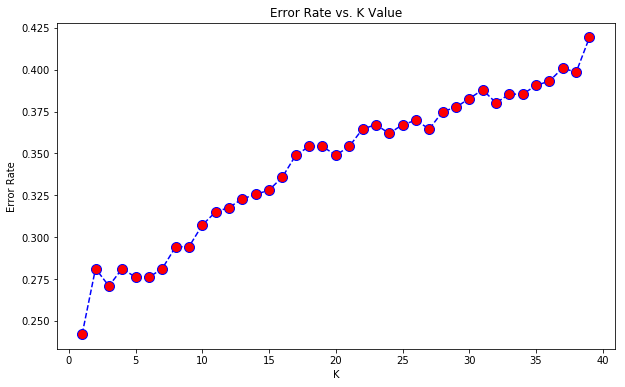

In [136]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [8]:
csidf.head()

,device,local,x,y,P_MW_LLTF,P_MW_HTLTF,P_DBM_LLTF,P_DBM_HTLTF,LLTF_-32,LLTF_-31,...,HTLTF_22,HTLTF_23,HTLTF_24,HTLTF_25,HTLTF_26,HTLTF_27,HTLTF_28,HTLTF_29,HTLTF_30,HTLTF_31
0,DIR,A1,1.0,6.05,68,1763,18.326305,32.462711,0.0,0.0,...,0.010802,0.009290,0.008327,0.007399,0.007119,0.006262,0.006651,0.001093,0.000000,0.000691
1,DIR,A1,1.0,6.05,91,2902,19.625982,34.627993,0.0,0.0,...,0.011217,0.010342,0.009044,0.008254,0.008135,0.007276,0.006987,0.001679,0.001042,0.000000
2,DIR,A1,1.0,6.05,79,1819,19.009755,32.599737,0.0,0.0,...,0.010077,0.008680,0.008371,0.007578,0.006863,0.006448,0.006138,0.001072,0.000479,0.000678
3,DIR,A1,1.0,6.05,82,2482,19.157725,33.949590,0.0,0.0,...,0.010430,0.009225,0.008090,0.007391,0.007126,0.006009,0.005721,0.000950,0.000000,0.000475
4,DIR,A1,1.0,6.05,43,736,16.433430,28.670187,0.0,0.0,...,0.010900,0.009533,0.008301,0.007413,0.007168,0.007106,0.006741,0.001219,0.000545,0.000771


In [11]:
colunas_compare_table = csidf.columns[1:4]
csidf[colunas_compare_table].head()

,local,x,y
0,A1,1.0,6.05
1,A1,1.0,6.05
2,A1,1.0,6.05
3,A1,1.0,6.05
4,A1,1.0,6.05


In [12]:
# colunas = csidf.columns[70:134]
# datalltf= csidf[colunas]
# X_train, X_test, y_train, y_test = train_test_split(datalltf,csidf[colunas_compare_table],test_size=0.2)

In [6]:
############################ TRATAMENTO DO ERRO DE ACORDO COM AS COORDENADAS X E Y. DATA:04/07/2019#######

In [25]:
#Usando HT-LTF apenas e não considerando a direção - Multiplas vezes
total_repeticoes = 10
colunas = csidf.columns[70:134]
locais = sorted(csidf["local"].unique())
colunas_compare_table = csidf.columns[1:4]
cols = ["index","repeticao","real_location","x_real","y_real","estimated_location","x_estimated","y_estimated","acertou","erro_dist"]
compare_table_acumulada = pd.DataFrame(columns=cols)
compare_table_debug = pd.DataFrame(columns=cols)
percent_acertos_df = pd.DataFrame(columns=locais,index=range(total_repeticoes))
percent_acertos_df_acumulada = pd.DataFrame(columns=locais,index=range(total_repeticoes))
percent_acertos_df["Total"]=0.00
for n in range(total_repeticoes):
    aux = 0
    for k in csidf["local"].unique():
        for j in csidf["device"].unique():
            data_y = csidf[(csidf["local"]==k) & (csidf["device"]==j)].copy()
            datalltf= data_y[colunas]
            if aux==0:
                #X_train, X_test, y_train, y_test = train_test_split(datalltf,data_y["local"],test_size=0.2)
                X_train, X_test, y_train, y_test = train_test_split(datalltf,data_y[colunas_compare_table],test_size=0.2)
                aux=aux+1
            else:
#                 X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(datalltf,data_y["local"],test_size=0.2)
                X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(datalltf,data_y[colunas_compare_table],test_size=0.2)
                X_train = X_train.append(X_train_aux)
                X_test = X_test.append(X_test_aux)
                y_train = y_train.append(y_train_aux)
                y_test = y_test.append(y_test_aux)
    minmeansquareerror = []
    best_index_match = []
    best_atual_index = 0
    menor_mse = 10000
    mse_atual = 0
    for k  in X_test.index:
    # k = X_test.index[3]
        menor_mse = 10000
        best_atual_index = 0
        for j in X_train.index:
            mse_atual = 0
            for w in X_train.columns:
                mse_atual += (X_train[w][j] - X_test[w][k])**(2)
            if mse_atual < menor_mse:
                menor_mse = mse_atual
                best_atual_index = j
        minmeansquareerror.append(menor_mse)
        best_index_match.append(best_atual_index)
    # print(minmeansquareerror)
    # print(best_index_match)
    # print("A localização real é:" + y_test[k])
    # print("A resposta do algoritmo deu:" + y_train[best_index_match])
    #GERANDO UMA TABELA DE COMPARAÇÃO
    compare_table = pd.DataFrame(columns=cols)
    compare_table["index"] = y_test.index
    compare_table["repeticao"] = n
    for x in range(len(compare_table)):
        compare_table["real_location"][x]=y_test["local"][y_test.index[x]]
        compare_table["x_real"][x]=y_test["x"][y_test.index[x]]
        compare_table["y_real"][x]=y_test["y"][y_test.index[x]]

    x=0
    for i in best_index_match:
        compare_table["estimated_location"][x] = y_train["local"][i]
        compare_table["x_estimated"][x] = y_train["x"][i]
        compare_table["y_estimated"][x] = y_train["y"][i]
        erro_x = compare_table["x_real"][x] - compare_table["x_estimated"][x]
        erro_y = compare_table["y_real"][x] - compare_table["y_estimated"][x]
        compare_table["erro_dist"][x] = (erro_x**(2)+erro_y**(2))**(1/2)
        if(compare_table["estimated_location"][x] == compare_table["real_location"][x]):
            compare_table["acertou"][x]=1
        else:
            compare_table["acertou"][x]=0
        x=x+1
    compare_table_acumulada = compare_table_acumulada.append(compare_table)
    compare_table_debug = compare_table_debug.append(compare_table)
    compare_table_debug.to_excel("Comp_Table_HTLTF_DEBUG_semdir_10x.xlsx",sheet_name='Comp_HTLTF_SemDir')
    for h in locais:
        acertos = len(compare_table[(compare_table["real_location"]==h) & (compare_table["acertou"]==1)])/len(compare_table[compare_table["real_location"]==h])
        percent_acertos_df[h][n]=acertos
    total = round((((len(compare_table[compare_table["acertou"]==1])/(len(compare_table))))*100),2)
    percent_acertos_df["Total"][n]= total
    percent_acertos_df_acumulada = percent_acertos_df_acumulada.append(percent_acertos_df)
    print("Total de acerto da repeticao "+ str(n) +": " + str(total) + "%")

compare_table_acumulada.to_excel("Comp_Table_HTLTF_semdir_10x.xlsx",sheet_name='Comp_HTLTF_SemDir')
percent_acertos_df_acumulada.to_excel("Percent_Table_HTLTF_semdir_10x.xlsx",sheet_name='Comp_HTLTF_SemDir')

C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Total de acerto da repeticao 0: 73.7%
Total de acerto da repeticao 1: 77.6%
Total de acerto da repeticao 2: 75.52%
Total de acerto da repeticao 3: 76.3%
Total de acerto da repeticao 4: 75.0%
Total de acerto da repeticao 5: 76.82%
Total de acerto da repeticao 6: 76.04%
Total de acerto da repeticao 7: 77.86%
Total de acerto da repeticao 8: 78.12%
Total de acerto da repeticao 9: 76.04%


In [26]:
#Usando HT-LTF apenas e considerando a direção - Multiplas vezes
total_repeticoes = 10
colunas = csidf.columns[70:134]
locais = sorted(csidf["local"].unique())
colunas_compare_table = csidf.columns[1:4]
cols = ["index","repeticao","real_location","x_real","y_real","estimated_location","x_estimated","y_estimated","acertou","erro_dist"]
compare_table_acumulada = pd.DataFrame(columns=cols)
compare_table_debug = pd.DataFrame(columns=cols)
percent_acertos_df = pd.DataFrame(columns=locais,index=range(total_repeticoes))
percent_acertos_df_acumulada = pd.DataFrame(columns=locais,index=range(total_repeticoes))
percent_acertos_df["Total"]=0.00
for n in range(total_repeticoes):
    aux = 0
    for k in csidf["local"].unique():
        for j in csidf["device"].unique():
            data_y = csidf[(csidf["local"]==k) & (csidf["device"]==j)].copy()
            datalltf= data_y[colunas]
            if aux==0:
                #X_train, X_test, y_train, y_test = train_test_split(datalltf,data_y["local"],test_size=0.2)
                X_train, X_test, y_train, y_test = train_test_split(datalltf,data_y[colunas_compare_table],test_size=0.2)
                aux=aux+1
            else:
#                 X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(datalltf,data_y["local"],test_size=0.2)
                X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(datalltf,data_y[colunas_compare_table],test_size=0.2)
                X_train = X_train.append(X_train_aux)
                X_test = X_test.append(X_test_aux)
                y_train = y_train.append(y_train_aux)
                y_test = y_test.append(y_test_aux)
    minmeansquareerror = []
    best_index_match = []
    best_atual_index = 0
    menor_mse = 10000
    mse_atual = 0
    for k  in X_test.index:
    # k = X_test.index[3]
        menor_mse = 10000
        best_atual_index = 0
        for j in X_train.index:
            mse_atual = 0
            if csidf["device"][k]==csidf["device"][j]:
                for w in X_train.columns:
                    mse_atual += (X_train[w][j] - X_test[w][k])**(2)
                if mse_atual < menor_mse:
                    menor_mse = mse_atual
                    best_atual_index = j
        minmeansquareerror.append(menor_mse)
        best_index_match.append(best_atual_index)
    # print(minmeansquareerror)
    # print(best_index_match)
    # print("A localização real é:" + y_test[k])
    # print("A resposta do algoritmo deu:" + y_train[best_index_match])
    #GERANDO UMA TABELA DE COMPARAÇÃO
    compare_table = pd.DataFrame(columns=cols)
    compare_table["index"] = y_test.index
    compare_table["repeticao"] = n
    for x in range(len(compare_table)):
        compare_table["real_location"][x]=y_test["local"][y_test.index[x]]
        compare_table["x_real"][x]=y_test["x"][y_test.index[x]]
        compare_table["y_real"][x]=y_test["y"][y_test.index[x]]

    x=0
    for i in best_index_match:
        compare_table["estimated_location"][x] = y_train["local"][i]
        compare_table["x_estimated"][x] = y_train["x"][i]
        compare_table["y_estimated"][x] = y_train["y"][i]
        erro_x = compare_table["x_real"][x] - compare_table["x_estimated"][x]
        erro_y = compare_table["y_real"][x] - compare_table["y_estimated"][x]
        compare_table["erro_dist"][x] = (erro_x**(2)+erro_y**(2))**(1/2)
        if(compare_table["estimated_location"][x] == compare_table["real_location"][x]):
            compare_table["acertou"][x]=1
        else:
            compare_table["acertou"][x]=0
        x=x+1
    compare_table_acumulada = compare_table_acumulada.append(compare_table)
    compare_table_debug = compare_table_debug.append(compare_table)
    compare_table_debug.to_excel("Comp_Table_HTLTF_DEBUG_comdir_10x.xlsx",sheet_name='Comp_HTLTF_ComDir')
    for h in locais:
        acertos = len(compare_table[(compare_table["real_location"]==h) & (compare_table["acertou"]==1)])/len(compare_table[compare_table["real_location"]==h])
        percent_acertos_df[h][n]=acertos
    total = round((((len(compare_table[compare_table["acertou"]==1])/(len(compare_table))))*100),2)
    percent_acertos_df["Total"][n]= total
    percent_acertos_df_acumulada = percent_acertos_df_acumulada.append(percent_acertos_df)
    print("Total de acerto da repeticao "+ str(n) +": " + str(total) + "%")

compare_table_acumulada.to_excel("Comp_Table_HTLTF_comdir_10x.xlsx",sheet_name='Comp_HTLTF_ComDir')
percent_acertos_df_acumulada.to_excel("Percent_Table_HTLTF_comdir_10x.xlsx",sheet_name='Comp_HTLTF_ComDir')

C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Total de acerto da repeticao 0: 87.5%
Total de acerto da repeticao 1: 85.42%
Total de acerto da repeticao 2: 86.2%
Total de acerto da repeticao 3: 86.2%
Total de acerto da repeticao 4: 84.11%
Total de acerto da repeticao 5: 85.68%
Total de acerto da repeticao 6: 86.72%
Total de acerto da repeticao 7: 86.46%
Total de acerto da repeticao 8: 88.8%
Total de acerto da repeticao 9: 83.85%


In [10]:
cdf_df = pd.read_excel("Comp_Table_HTLTF_semdir_10x.xlsx", sheet_name="Comp_HTLTF_SemDir")
cdf_df.drop("Unnamed: 0", axis=1, inplace=True)
cdf_df.head()

,index,repeticao,real_location,x_real,y_real,estimated_location,x_estimated,y_estimated,acertou,erro_dist
0,19,0,A1,1.0,6.05,B1,2.15,6.05,0,1.15
1,14,0,A1,1.0,6.05,A1,1.00,6.05,1,0.00
2,20,0,A1,1.0,6.05,A1,1.00,6.05,1,0.00
3,3,0,A1,1.0,6.05,A1,1.00,6.05,1,0.00
4,34,0,A1,1.0,6.05,A1,1.00,6.05,1,0.00


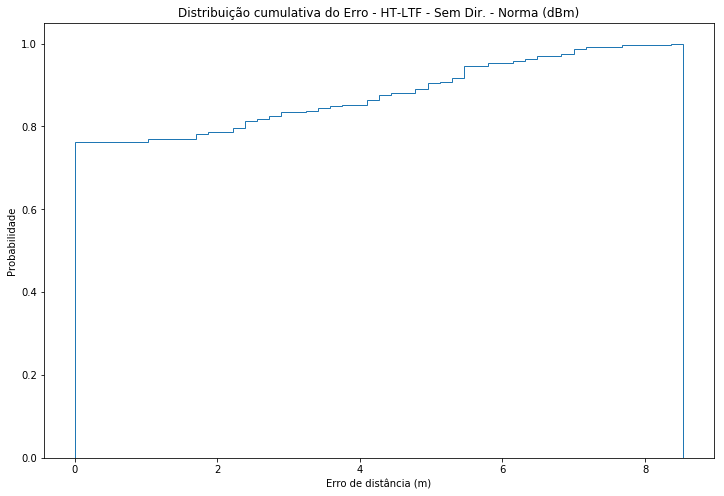

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
# plot the cumulative histogram
x=cdf_df["erro_dist"]
n_bins = 50
# plot the cumulative histogram
n, bins, patches = ax.hist(x, n_bins, density=True, histtype='step',
                           cumulative=True)

# Overlay a reversed cumulative histogram.
# ax.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,
#         label='CDF Reverso.')

# tidy up the figure
#ax.grid(True)
#ax.legend(loc='right')
ax.set_title('Distribuição cumulativa do Erro - HT-LTF - Sem Dir. - Norma (dBm)')
ax.set_xlabel('Erro de distância (m)')
ax.set_ylabel('Probabilidade')

plt.savefig("CDF_HLTF_Semdir_Norma_dbm.png")
plt.show()

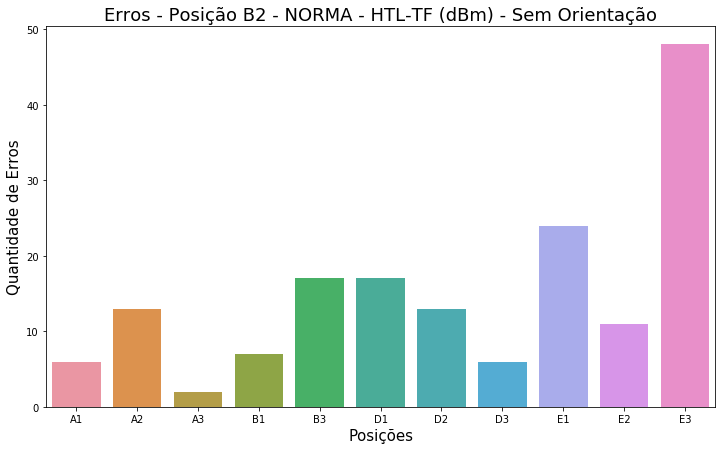

In [12]:
plt.figure(figsize=(12,7))
b2_com_dir_df = cdf_df[(cdf_df["real_location"]=="B2")&(cdf_df["estimated_location"]!="B2")]
locais = sorted(b2_com_dir_df["estimated_location"].unique())
sns.countplot(x="estimated_location",data=b2_com_dir_df,order=locais)
plt.title("Erros - Posição B2 - NORMA - HTL-TF (dBm) - Sem Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Quantidade de Erros", fontsize=15)
plt.savefig("countplot_ERROS_Pos_B2_norma_dbm_HT_LTF_Sem_dir.png")

In [13]:
cdf_df = pd.read_excel("Comp_Table_HTLTF_comdir_10x.xlsx", sheet_name="Comp_HTLTF_ComDir")
cdf_df.drop("Unnamed: 0", axis=1, inplace=True)
cdf_df.head()

,index,repeticao,real_location,x_real,y_real,estimated_location,x_estimated,y_estimated,acertou,erro_dist
0,5,0,A1,1.0,6.05,E1,7.35,6.55,0,6.369655
1,7,0,A1,1.0,6.05,A1,1.00,6.05,1,0.000000
2,23,0,A1,1.0,6.05,A1,1.00,6.05,1,0.000000
3,19,0,A1,1.0,6.05,A1,1.00,6.05,1,0.000000
4,32,0,A1,1.0,6.05,A1,1.00,6.05,1,0.000000


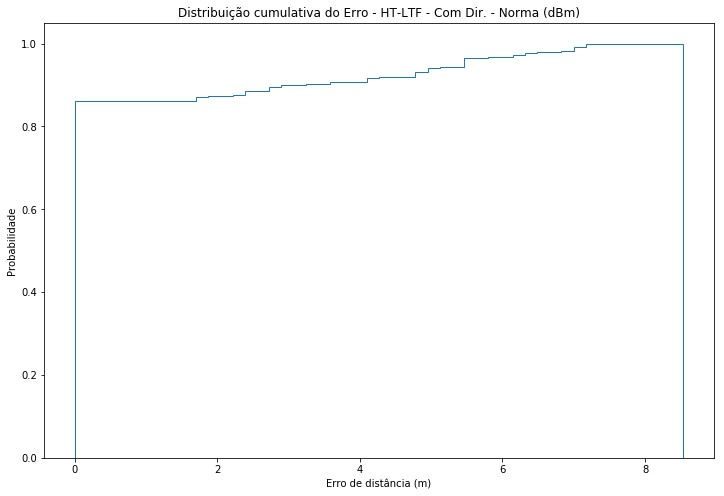

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
# plot the cumulative histogram
x=cdf_df["erro_dist"]
n_bins = 50
# plot the cumulative histogram
n, bins, patches = ax.hist(x, n_bins, density=True, histtype='step',
                           cumulative=True)

# Overlay a reversed cumulative histogram.
#ax.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,
#       label='CDF Reverso.')

# tidy up the figure
#ax.grid(True)
#ax.legend(loc='right')
ax.set_title('Distribuição cumulativa do Erro - HT-LTF - Com Dir. - Norma (dBm)')
ax.set_xlabel('Erro de distância (m)')
ax.set_ylabel('Probabilidade')

plt.savefig("CDF_HLTF_Comdir_Norma_dbm.png")
plt.show()

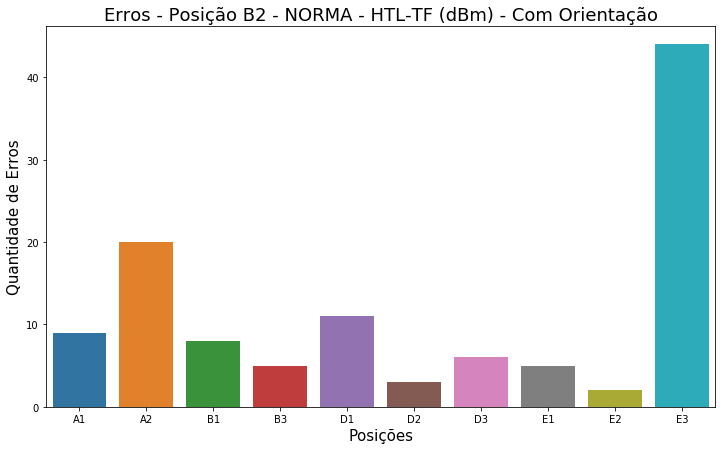

In [15]:
plt.figure(figsize=(12,7))
b2_com_dir_df = cdf_df[(cdf_df["real_location"]=="B2")&(cdf_df["estimated_location"]!="B2")]
locais = sorted(b2_com_dir_df["estimated_location"].unique())
sns.countplot(x="estimated_location",data=b2_com_dir_df,order=locais)
plt.title("Erros - Posição B2 - NORMA - HTL-TF (dBm) - Com Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Quantidade de Erros", fontsize=15)
plt.savefig("countplot_ERROS_Pos_B2_norma_dbm_HT_LTF_Com_dir.png")